In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
class kmeans:

    # tính khoảng cách các vector theo đường chéo ma trận
    def euclid_distance(self, x1_y1, x2_y2):
        return np.sqrt((x1_y1[0] - x2_y2[0])**2 + (x1_y1[1] - x2_y2[1])**2 + (x1_y1[2] - x2_y2[2])**2)
    
    #xác định vị trí của điểm trung tâm của 1 khung màu
    def determine_random_centroids(self):
        determine_random_centroids = [] # tạo 1 list rỗng
        
        for i in range(self.k_clusters):
            random_x = np.random.rand() * self.img_1d.width
            random_y = np.random.rand() * self.img_1d.height
            determine_random_centroids.append((random_x, random_y))
            
        self.centroids = determine_random_centroids
        return determine_random_centroids
    
#     Assign data points to clusters_Gán các điểm dữ liệu vào các cụm
#     1. khai báo 1 ma trận (toàn là giá trị 1)
#     2. tạo biến không gian để xử lí list 2d
#        a. khai báo 1 cái list rỗng
#        b. trong khoảng k (cluster): 
#           list những điểm trung tâm từ ảnh (vector) gốc sang ảnh kết quả (ảnh sau được xử lí giảm số lượng màu) 
#           list các điểm sang ảnh tạm
#           khoảng cách từ mỗi điểm trung tâm đến các điểm dữ liệu trong ảnh
#           thêm các giá trị khoảng cách vừa rồi vào cuối list rỗng vừa tạo
#        c. #kiểm tra các giá trị nhỏ nhất trong dist trên và thêm 1 giá trị cluster rỗng vì 
#        d. thực hiện gán các giá trị nhỏ nhất trong disc theo thứ tự vào cluster_map
#        e. self.pixel_map[x,y] = self.img_1d_copy.getpixel(self.centroids[index - 1])
#     3. Check convergence: kiểm tra các điểm dữ liệu đến điểm trung tâm là gần nhất
#        a. #mấu chốt để kết thúc hàm tạo các điểm trung tâm ứng với cluster, TRUE khi toàn bộ dữ liệu của ma trận cluster_map ở khởi tạo giống vs ma trận cluster
#     4. Ngược lại thì gán ma trận cluster_map vào ma trận của hàm khởi tạo
#     5. trả về giá trị cluster_map vừa xử lí xong
    def assign_data(self):
        cluster_map = self.cluster_map
        for i in range(self.img_1d.width):
            for j in range(self.img_1d.height):
                distance = []
                for m in range(self.k_clusters):
                    in_pixels = self.img_1d_copy.getpixel(self.centroids[m])
                    point_pixel = self.img_1d_copy.getpixel((i,j))
                    euclid_dist = self.euclid_distance(in_pixels, point_pixel)
                    distance.append(euclid_dist)
                index = distance.index(min(distance)) + 1
                cluster_map[j][i] = index
                
                self.pixel_map[i,j] = self.img_1d_copy.getpixel(self.centroids[index - 1])
                
        if (cluster_map == self.cluster_map).all():
            self.convergation = True #mấu chốt để kết thúc hàm 
        self.cluster_map = cluster_map
        return cluster_map
    
    
    def modify_new_map(self):
        new_map = self.assign_data()
        new_index = np.unique(new_map)
        new_centroids = []
        
        for temp in new_index:
            value = 0;
            x_vals = y_vals = value;
            
            for i in range(self.img_1d.height):
                for j in range(self.img_1d.width):
                    if new_map[i,j] == temp:
                        x_vals += i
                        y_vals += j
                        value += 1
            new_centroids.append((x_vals/value, y_vals/value))
        self.centroids = new_centroids
    
    
    # xử lí để tính theo k cluster theo người dùng nhập vào
    def cluster(self):
        while self.convergation == False:
            self.modify_new_map()
            self.assign_data()
            
            
    # tạo một hàm dựng khởi đầu cho class kmeans
    def __init__(self, img_path, k_clusters = 5):
        self.img_1d = Image.open(img_path)
        
        self.img_1d_copy = self.img_1d.copy()
        self.pixel_map = self.img_1d.load()
        
        self.k_clusters = k_clusters
        self.cluster_map = np.ones((self.img_1d.height, self.img_1d.width))
        self.centroids = self.determine_random_centroids()
        self.convergation = False

In [3]:
class Operate:
    
    #cho phép người dùng nhập vào lựa chọn (1,2) để lựa chọn định dạng lưu ảnh đầu ra
    def choose_output_format(self, out):
        if out == 1:
            return str('.png')
        elif out == 2:
            return str('.jpg')

        
    # chương trình 'main' cho phép người dùng nhập vào tên tập tin ảnh mỗi lần chương trình thực thi
    def main(self):
        image_path = input('Enter image file name: ')
        k_clusters = int(input("Enter number of clusters: "))

        # Menu for users
        print("\ninput \"1\" for \".png\"")
        print("input \"2\" for \".jpg\"")
        print("input \"3\" for other types of image format (self-entered user)")

        out = int(input('Choose the output image saving format: '))
        if out == 1 or out == 2:
            image_path = image_path + str(self.choose_output_format(out))
        else:
            file_format = input('Enter the image saving format: ')
            image_path = image_path + str(file_format)
        

        print('\nInput:\n', '-Image file name: ' + image_path + '\n', '-Number of clusters: ' + str(k_clusters))
        
        
        # hàm xử lí ảnh bằng thuật toán K-Means
        k_means = kmeans(image_path, k_clusters)
        k_means.cluster()

        
        # hàm in ra console hình ảnh
        print('\nThe image after being processed with Color Compression')
        plt.imshow(k_means.img_1d) 
        
        
        # lưu ảnh ở định dạng tùy ý theo người dùng
        print("\nsave image as \".png\" enter \"1\"")
        print("save image as \".jpg\" enter \"2\"")
        print("save image as \".pdf\" enter \"3\"")
        choice = int(input('Choose the output image saving format: '))
        if choice == 1:
            saved_output = '.png'
        if choice == 2:
            saved_output = '.jpg'
        if choice == 3:   
            saved_output = '.pdf'
        
        saved_img = str(input('Enter file image name: '))
        saved_img = saved_img + saved_output
        
        
        k_means.img_1d.save(saved_img)
        print('\nOutput:\n','-Image\'s name saved as ' + str(saved_img))

Enter image file name (include image format): summer.png


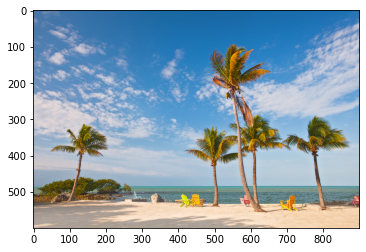

In [4]:
# Đọc hiển thị bức ảnh đầu vào
image_path = str(input('Enter image file name (include image format): '))
image = Image.open(image_path)
image = np.asarray(image)
plt.imshow(image)

Enter image file name: summer
Enter number of clusters: 9

input "1" for ".png"
input "2" for ".jpg"
input "3" for other types of image format (self-entered user)
Choose the output image saving format: 1

Input:
 -Image file name: summer.png
 -Number of clusters: 9

The image after being processed with Color Compression

save image as ".png" enter "1"
save image as ".jpg" enter "2"
save image as ".pdf" enter "3"
Choose the output image saving format: 1
Enter file image name: summer9

Output:
 -Image's name saved as summer9.png


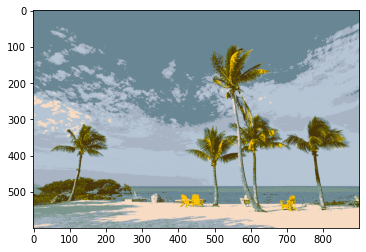

In [5]:
start_program = Operate()
start_program.main()

In [131]:
# append trong python là phương thức dùng để thêm một phần tử vào cuối một list trong python
#. Chúng ta sử dụng append để thêm một số, một list, một chuỗi hoặc một tuple
# như là một phần tử vào cuối một list python.

In [132]:
# load() => Để chuyển đổi từ một dictionary thành một JSON string.